<a href="https://colab.research.google.com/github/jgullinkala/AirQualityRegression/blob/main/Brett_Payton__Assignment_5_1_NLP_Coding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# PART 1: SETUP"**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q1: Load the data**

In [ ]:
import pandas as pd
import numpy as np
from numpy.random import seed
import tensorflow as tf
seed(1234)
tf.random.set_seed(seed = 1234)

dfraw = pd.read_excel('/content/drive/MyDrive/train_set.xlsx')
cols_to_include = ['essay', 'essay_set', 'domain1_score']
renaming = {'domain1_score': 'score'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
df.head()


,essay,essay_set,score
0,"Dear local newspaper, I think effects computer...",1,8
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",1,9
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",1,7
3,"Dear Local Newspaper, @CAPS1 I have found that...",1,10
4,"Dear @LOCATION1, I know having computers has a...",1,8


**Q2: Select the data from a single essay set**

In [ ]:
import os
import pandas as pd
import re

df[df['essay_set'] == 7]

,essay,essay_set,score
10684,Patience is when your waiting .I was patience ...,7,15
10685,"I am not a patience person, like I can’t sit i...",7,13
10686,One day I was at basketball practice and I was...,7,15
10687,I going to write about a time when I went to t...,7,17
10688,It can be very hard for somebody to be patient...,7,13
...,...,...,...
12248,One time I was getting a cool @CAPS1 game it w...,7,12
12249,A patent person in my life is my mom. Aicason ...,7,16
12250,A time when someone else I know was patient wa...,7,19
12251,I hate weddings. I love when people get marrie...,7,22


**Q3: Plot the distribution of scores**

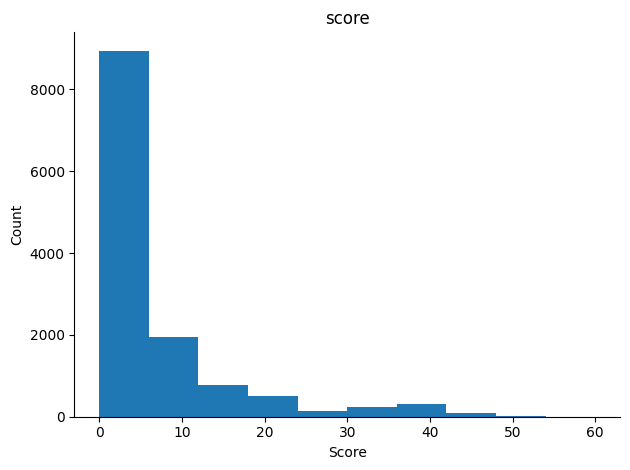

In [ ]:
from matplotlib import pyplot as plt
df['score'].plot(kind='hist', bins=10, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Q4: Create a test/train split**

In [ ]:
from sklearn.model_selection import train_test_split

features = ['essay', 'essay_set']
X = df.loc[:, features]
y = df.loc[:, ['score']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

print(X.shape)
print(y.shape)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12976, 2)
(12976, 1)
(10380, 2)
(2596, 2)
(10380, 1)
(2596, 1)


**Q5: Create vectors using term frequency**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['essay', 'essay_set',]

